In [1]:
import numpy as np
from IPython.display import clear_output

import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm
import pandas as pd
import copy
import collections

In [2]:
P_0_matrix=np.loadtxt('P0.txt')
P_0_matrix.reshape(50,50)
P_0_matrix

array([[0.73881685, 0.26118315, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8244554 , 0.08800113, 0.08754346, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22049019, 0.47741673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.19795463, 0.45158499,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08417532, 0.88170679,
        0.03411789],
       [0.        , 0.        , 0.        , ..., 0.        , 0.93402461,
        0.06597539]])

In [3]:
P_1_matrix=np.loadtxt('P1.txt')
P_1_matrix.reshape(50,50)
P_1_matrix

array([[0.42490504, 0.57509496, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5285555 , 0.25960852, 0.21183599, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09898388, 0.17406648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25864446, 0.34423948,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.67207827, 0.01613933,
        0.31178239],
       [0.        , 0.        , 0.        , ..., 0.        , 0.52699009,
        0.47300991]])

In [4]:
action_space=[0,1]
state_space=[i for i in range(50)]
reward_matrix=np.loadtxt('reward.txt').reshape((50,2))

In [5]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [6]:
# temp=[]
# for i in range(100):
#     new_state=np.random.choice(state_space,replace=True,p=P_0_matrix(0.4)[4])
#     temp.append(new_state)

In [7]:
# freq=collections.Counter(temp)
# names = list(freq.keys())
# values = list(freq.values())

# plt.bar(range(len(freq)), values, tick_label=names)

In [8]:
N=20
M=10
epsilon=0.1
arm_indexes=[i for i in range(N)]


In [9]:
def act(Q_values,epsilon,state,arm_index):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[arm_index][state])
  return action

In [10]:
current_state=[random.choice(state_space) for _ in range(N)]  


In [11]:
# Q1=copy.deepcopy(reward_matrix)
# Q2=copy.deepcopy(reward_matrix)
# Q3=copy.deepcopy(reward_matrix)
# Q4=copy.deepcopy(reward_matrix)

# w1=0
# w2=0
# w3=0
# w4=0



In [12]:
Q_values=[]
w_values=[]
for _ in range(50):
    Q_values.append(copy.deepcopy(reward_matrix))
    w_values.append(0)

In [13]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]
w_overtime=[]

In [14]:
for i in range(1,1000001):
  action_sum=0
  reward_sum=0
  T=False
  alpha=1/np.ceil(1+i/5000)
  # if(i<50000):
  #   beta=0
  # else:
  if i%100==0:
    beta=1/(1+np.ceil((i)*np.log(i)/5000))
  else:
    beta=0
  temp=0
  reward=0
  new_state=0
  epsilon=0.1
  whittle_index_arms=[]
  for j in range(N):
    for k in range(len(w_values)):
      if current_state[j]==k:
        whittle_index_arms.append(w_values[k])

      # print(i)
      # print('wohooo')

  # indices_to_pull=get_indices_to_pull(epsilon,whittle_indexes,arm_indexes,M,current_state)
  if random.random()>0.1:
    indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-M:]
  else:
    indices_to_pull=random.choices(arm_indexes,k=M)
  # print(indices_to_pull)
  # if(i==50000):
  #   print(Q_values)
  #   T=True
  for index in arm_indexes:
      # temp=copy.deepcopy(Q_values)
      if index in indices_to_pull:
        # print(i)
        # print(alpha)
        # print(beta)
        # action=np.argmax(Q_values[index][current_state[index]])
        action=1
        # print(current_state)
        # print(action)

        action_sum+=action
        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        # print(new_state)
        reward=x[1]
        for k in range(len(Q_values)):
        # print(reward)
          Q_values[k][current_state[index]][action]=(1-alpha)*(Q_values[k][current_state[index]][action])+alpha*(reward+max(Q_values[k][new_state])-(np.array(Q_values[k]).sum())/100)
        # Q2[current_state[index]][action]=(1-alpha)*(Q2[current_state[index]][action])+alpha*(reward+max(Q2[new_state])-(np.array(Q2).sum())/8)
        # Q3[current_state[index]][action]=(1-alpha)*(Q3[current_state[index]][action])+alpha*(reward+max(Q3[new_state])-(np.array(Q3).sum())/8)
        # Q4[current_state[index]][action]=(1-alpha)*(Q4[current_state[index]][action])+alpha*(reward+max(Q4[new_state])-(np.array(Q4).sum())/8)


        
        # Q_values=Q_value_update(Q_values,current_state[index],new_state,action,reward,index,whittle_indexes[index][current_state[index]],alpha)
        # print(Q_values)
        # whittle_indexes[index][current_state[index]]+=beta*temp


        # print(whittle_indexes)
        # print("--")
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)
      else:
        # print(i)
        # print(alpha)
        # print(beta)
        # action=np.argmax(Q_values[index][current_state[index]])
        action=0
        # print(current_state)
        # print(action)

        action_sum+=action
        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        # print(new_state)
        reward=x[1]
        # print(reward)
        for k in range(len(Q_values)):
        # print(reward)
          Q_values[k][current_state[index]][action]=(1-alpha)*(Q_values[k][current_state[index]][action])+alpha*(reward+max(Q_values[k][new_state])-(np.array(Q_values[k]).sum())/100)
        
        # print(Q_values)
        # whittle_indexes[index][current_state[index]]+=beta*temp

        # print(whittle_indexes)
        # print("--")
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)
  # print(i)
  # print(whittle_indexes)
  # print(current_state[index])
  # print(Q_values[index][current_state[index]][1])
  # print(Q_values[index][current_state[index]][0])
  # print((Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]))
  # print('----')
  # whittle_indexes=whittle_indexes_update(whittle_indexes,Q_values,beta,arm_indexes,state_space,T)
  # print(w5)
  # clear_output()
  for k in range(len(Q_values)):
    w_values[k]=w_values[k]+beta*(Q_values[k][k][1]-Q_values[k][k][0])
 
  # whittle_indexes_over_time.append(copy.deepcopy(whittle_indexes))
  w_overtime.append([w_values[0],w_values[1],w_values[2],w_values[3]])
  # epsilon=epsilon*gamma
  if epsilon<=0.1:
    epsilon=0.1
  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)








In [15]:
Q_values

[array([[ 65.689763  ,  65.27942374],
        [ 65.68605598,  65.71953837],
        [ 65.93001055,  65.16143572],
        [ 65.99877438,  65.75189167],
        [ 65.3855615 ,  65.10695242],
        [ 63.13236337,  63.51238522],
        [ 61.73673369,  60.91285263],
        [ 59.46880039,  60.08328029],
        [ 59.11231366,  59.69817746],
        [ 59.42149059,  58.3812593 ],
        [ 54.94532771,   6.62154559],
        [ 13.2113661 ,  26.55599956],
        [ 18.05973315,   8.11923047],
        [ 10.56351654,  15.72684505],
        [  6.88607741,  10.36210036],
        [  2.8986025 ,   6.41692328],
        [  1.26733554,  -3.82041329],
        [ -4.71812052,  -4.08430731],
        [ -8.69275718,  -4.62509833],
        [-12.60985375, -14.04849982],
        [-14.41740331, -15.20393973],
        [-16.61985883, -17.62835829],
        [-19.86826846, -19.52800734],
        [-20.50250967, -19.98653349],
        [-19.97945218, -20.61524584],
        [-19.80585693, -20.14374064],
        [-20

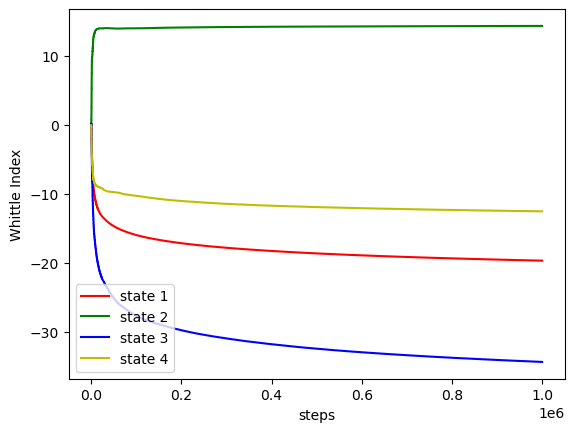

In [19]:
t=1000000
j=0
state1=[w_overtime[i][0] for i in range(t)]
state2=[w_overtime[i][1] for i in range(t)]
state3=[w_overtime[i][2] for i in range(t)]
state4=[w_overtime[i][3] for i in range(t)]
plt.figure()
plt.plot(state1,color='r',label='state 1')
plt.plot(state2,color='g',label='state 2')
plt.plot(state3,color='b',label='state 3')
plt.plot(state4,color='y',label='state 4')
plt.legend()
plt.ylabel('Whittle Index')
plt.xlabel('steps')
# plt.ylim([-2,2])
plt.show()

In [20]:
w_overtime[100000-2]

[-15.941457086985858,
 14.022450543930324,
 -27.63818578377766,
 -10.261622872443507]

In [18]:
beta

0.0003616636528028933

In [21]:
w_values

[-19.660060396751067,
 14.373336889124467,
 -34.33975361395317,
 -12.506083358394516,
 -4.6258266880423164,
 135.10688861988373,
 -193.98326176088273,
 -25.589238750254353,
 41.00147997898981,
 -91.10347202289229,
 -1028.431961509075,
 330.7346603695959,
 -206.47827401599747,
 95.40414204527319,
 56.97438795660443,
 54.079849354264866,
 -93.66638625626456,
 12.121306014153287,
 69.99784514969211,
 -38.60252054496673,
 -7.555488950700481,
 -34.63351512783999,
 21.72237901664558,
 19.80768846580203,
 -21.724908968164083,
 -10.517356299646696,
 -14.526882166999393,
 1.7952756009480315,
 24.017293440848142,
 -14.10693269947701,
 0.5159627543090228,
 125.86790532911785,
 -0.5214318104699007,
 7.398692880250207,
 -28.017265918772782,
 25.133988212552307,
 16.52305980183279,
 -13.323900069526388,
 -10.71714934805135,
 -20.319316668781397,
 -35.68538113186529,
 -20.061405572819258,
 -22.196582124755043,
 10.841443269136771,
 1.379661259729828,
 30.44212577447818,
 -4.491056198375303,
 -32.1009